# Day 6

In [95]:
import numpy as np

In [96]:
fobj = open("Day_6_input.txt", "r")
# fobj = open("day6inp1", "r")
rawStr = fobj.read()

In [97]:
def turnRight(tup):
    # y goes down rows top-to-bottom
    # x goes across columns right-to-left
    # tup is y,x
    # arr[y][x]

    # trigonometric calculations broke down to a vector rotation, which when plugged with pi/2, gave us this:
    return (tup[1],-tup[0])

turnRight((-1,0))

(0, 1)

In [98]:
rawStr +='\n'
tempGrid = [[x for x in y] for y in rawStr.split()]
grid = np.array(tempGrid)
grid

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '#', '.'],
       ...,
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '#', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U1')

In [99]:
obstacle_list = np.where(grid == "#") # returns coordinates
obstacles_r = [(y,x) for y,x in zip(obstacle_list[0], obstacle_list[1])]

startPos = np.where(grid == "^")
startPos = (startPos[0][0], startPos[1][0])
print(f" ^ {startPos}")


 ^ (45, 42)


In [100]:
direction = ( -1 , 0 ) # FACING UP

In [101]:
# obstacles = sorted(obstacles, key=lambda tup: tup[0])
obstacles_c = sorted(obstacles_r, key=lambda tup: tup[1])
print("Obstacles in col view: ", obstacles_c[:15])
print("Obstacles in row view: ", obstacles_r[:15])

# the second coord is x

Obstacles in col view:  [(47, 0), (67, 0), (5, 1), (8, 1), (14, 1), (22, 1), (29, 1), (38, 1), (66, 1), (71, 1), (90, 1), (93, 1), (101, 1), (110, 1), (114, 1)]
Obstacles in row view:  [(0, 6), (0, 18), (0, 49), (0, 80), (0, 108), (0, 109), (0, 125), (1, 13), (1, 28), (1, 37), (1, 44), (1, 45), (1, 97), (1, 110), (1, 111)]


In [102]:
# arr=[0,2,3,5]
# arr[::1]

In [103]:
from timeit import default_timer

In [104]:
# start_time = default_timer()

# y,x = startPos
# path=[startPos]
# # itervar = 0
# while(True):
#     # itervar += 1
#     # if(itervar>=250000):
#     #     print("AH FUYCK")
#     #     break
#     if direction[0] == 0:
#         # Row iter, say ( direction == (0,1) right)
#         obstacles_ahead = [tup for tup in obstacles_r if tup[0] == y]
#         obstacles_ahead = [tup for tup in obstacles_ahead if (tup[1]<=x and direction[1]==-1) or (tup[1]>=x and direction[1]==1)]
#         if len(obstacles_ahead) == 0:
#             print("Reached out of grid area")
#             break
#         else:
#             for elem in obstacles_ahead[::direction[1]]:
#                 if (direction[1] == -1 and elem[1] <= x) or (direction[1] == 1 and elem[1] >= x):
#                     y = elem[0]
#                     x = elem[1] -1 * direction[1]
#                     path.append((y,x))
#                     direction = turnRight(direction)
#                     break

#     elif direction[1] == 0:
#         # Column iter, say ( direction == (-1, 0) up)
#         obstacles_ahead = [tup for tup in obstacles_c if tup[1] == x]
#         obstacles_ahead = [tup for tup in obstacles_ahead if (tup[0]<=y and direction[0]==-1) or (tup[0]>=y and direction[0]==1)]
#         if len(obstacles_ahead) == 0:
#             print("Reached out of grid area")
#             break
#         else:
#             for elem in obstacles_ahead[::direction[0]]:
#                 if (direction[0] == -1 and elem[0] <= y) or (direction[0] == 1 and elem[0] >= y):
#                     x = elem[1]
#                     y = elem[0] -1 * direction[0]
#                     path.append((y,x))
#                     direction = turnRight(direction)
#                     break
# elapsed = default_timer() - start_time
# print(elapsed)
# path[:25]    

In [105]:
start_time = default_timer()

y,x = startPos # 45=y, 42=x
apath=[startPos]
# itervar = 0
while(True):
    # itervar += 1
    # if(itervar>=250000):
    #     print("AH FUYCK")
    #     break
    if direction[0] == 0:
        # Row iter, say ( direction == (0,1) right)
        obstacles_ahead = [tup for tup in obstacles_r if tup[0] == y]
        obstacles_ahead = [tup for tup in obstacles_ahead if (tup[1]<=x and direction[1]==-1) or (tup[1]>=x and direction[1]==1)]
        if len(obstacles_ahead) == 0:
            print("Reached out of grid area.") #THIS NEEDS TO ADD REMAINDER POSITIONS AS WELL
            break
        else:
            elem = obstacles_ahead[::direction[1]][0]
            # if (direction[1] == -1 and elem[1] <= x) or (direction[1] == 1 and elem[1] >= x):
            y = elem[0]
            x = elem[1] -1 * direction[1]
            apath.append((y,x))
            direction = turnRight(direction)
            

    elif direction[1] == 0:
        # Column iter, say ( direction == (-1, 0) up)
        obstacles_ahead = [tup for tup in obstacles_c if tup[1] == x]
        obstacles_ahead = [tup for tup in obstacles_ahead if (tup[0]<=y and direction[0]==-1) or (tup[0]>=y and direction[0]==1)]
        if len(obstacles_ahead) == 0:
            print("Reached out of grid area.")
            break
        else:
            elem = obstacles_ahead[::direction[0]][0]
            # if (direction[0] == -1 and elem[0] <= y) or (direction[0] == 1 and elem[0] >= y):
            x = elem[1]
            y = elem[0] -1 * direction[0]
            apath.append((y,x))
            direction = turnRight(direction)
            
elapsed2 = default_timer() - start_time
print("Time taken: ", elapsed2)
print("number of turns: ", len(apath))
print(apath[-1:-4:-1])
print(apath[:3])

Reached out of grid area.
Time taken:  0.010914199985563755
number of turns:  133
[(17, 4), (17, 23), (16, 23)]
[(45, 42), (27, 42), (27, 77)]


In [106]:
# print(100*((elapsed-elapsed2) / float(elapsed)))

# The following code checks for repeated-right-turn caused duplicate members in apath:
seen = set()
apath = [tup for tup in apath if tup not in seen and (seen.add(tup) or True)]
print(len(seen))
print(len(apath))

133
133


In [107]:
# new code that appends a final stop for apath goes here
def postFinalObstacle(tup, direction, gridsize):
    finalSteps = list()
    y = tup[0]
    x = tup[1]
    while(True):
        y += direction[0]
        x += direction[1]
        finalSteps.append( (y,x))
        if x==0 or x==gridsize-1 or y==0 or y==gridsize-1:
            break
    return finalSteps

In [108]:
print(apath[-1])
print(direction)
# apath.extend( postFinalObstacle(apath[-1], direction, grid.shape[0]) )

(17, 4)
(-1, 0)


In [109]:
uniquePointCount = 0
travelledPoints = set()
for i in range(len(apath)-1):
    p2 = apath[i+1]
    p1 = apath[i]
    diffy = p2[0] - p1[0]
    diffx = p2[1] - p1[1]
    if diffy == 0:
        for j in range( abs(diffx) + 1 ):
            temp = j*(diffx/abs(diffx))
            tup = (p1[0], int(p1[1]+temp))
            if tup in travelledPoints and tup not in seen:
                print(f"INTERSECTION AT {tup}")
                # uniquePointCount -= 1
                # pass
            else:
                uniquePointCount += 1
                travelledPoints.add( tup  )
                print("x trav: ", tup)
    else:
        for j in range( abs(diffy) + 1 ):
            temp = j*(diffy/abs(diffy))
            tup = (int(p1[0]+temp), p1[1])
            if tup in travelledPoints and tup not in seen:
                print(f"INTERSECTION AT {tup}")
                # uniquePointCount -= 1
                # pass
            else:
                uniquePointCount += 1
                travelledPoints.add( tup  )
                print("y trav: ", tup )

# print("\n", uniquePointCount) THIS IS WRONG



y trav:  (45, 42)
y trav:  (44, 42)
y trav:  (43, 42)
y trav:  (42, 42)
y trav:  (41, 42)
y trav:  (40, 42)
y trav:  (39, 42)
y trav:  (38, 42)
y trav:  (37, 42)
y trav:  (36, 42)
y trav:  (35, 42)
y trav:  (34, 42)
y trav:  (33, 42)
y trav:  (32, 42)
y trav:  (31, 42)
y trav:  (30, 42)
y trav:  (29, 42)
y trav:  (28, 42)
y trav:  (27, 42)
x trav:  (27, 42)
x trav:  (27, 43)
x trav:  (27, 44)
x trav:  (27, 45)
x trav:  (27, 46)
x trav:  (27, 47)
x trav:  (27, 48)
x trav:  (27, 49)
x trav:  (27, 50)
x trav:  (27, 51)
x trav:  (27, 52)
x trav:  (27, 53)
x trav:  (27, 54)
x trav:  (27, 55)
x trav:  (27, 56)
x trav:  (27, 57)
x trav:  (27, 58)
x trav:  (27, 59)
x trav:  (27, 60)
x trav:  (27, 61)
x trav:  (27, 62)
x trav:  (27, 63)
x trav:  (27, 64)
x trav:  (27, 65)
x trav:  (27, 66)
x trav:  (27, 67)
x trav:  (27, 68)
x trav:  (27, 69)
x trav:  (27, 70)
x trav:  (27, 71)
x trav:  (27, 72)
x trav:  (27, 73)
x trav:  (27, 74)
x trav:  (27, 75)
x trav:  (27, 76)
x trav:  (27, 77)
y trav:  (

In [110]:
templist = postFinalObstacle(apath[-1], direction, grid.shape[0])
for coord in templist:
    travelledPoints.add(coord)
print(len(travelledPoints))

4454


In [111]:
for tup in obstacles_r:
    if tup in travelledPoints:
        print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA MF")

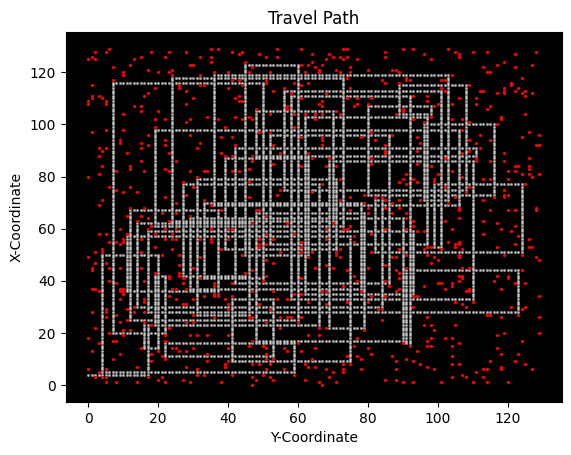

In [112]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xlist = []
ylist = []
for tup in travelledPoints:
    ylist.append(tup[0])
    xlist.append(tup[1])
oby = []
obx = []
for tup in obstacles_r:
    oby.append(tup[0])
    obx.append(tup[1])

# cmap = cm.get_cmap('gray')  # You can choose any other colormap from matplotlib.cm
# myColor = cmap(range(len(travelledPoints))[::-1])
plt.gca().set_facecolor('black')
plt.xlabel("Y-Coordinate", color='black')
plt.ylabel("X-Coordinate", color='black')
plt.title("Travel Path", color='black')

plt.scatter(ylist, xlist, s=1.5, color='white', alpha=0.5)
plt.scatter(oby, obx, s=1.75, color="red")
plt.show()